In [ ]:
# default_exp module21

# Import

In [ ]:
# export
import numpy as np
import matplotlib.pyplot as plt

from cs371.utils import *

In [ ]:
class AdjacencySetGraph:
    def __init__(self, V=None, E=None):
        V = V if V else set()
        E = E if E else set()
        
        self.V = set()
        self._nbrs = {}
        for v in V:
            self.add_vertex(v)
        for e in E:
            self.add_edge(e)
                
    def vertices(self):
        return self.V
    
    def edges(self):
        edges = set()
        for v1 in self.V:
            for v2 in self._nbrs[v1]:
                edges.add((v1, v2))
        return edges
    
    def add_vertex(self, v):
        if v not in self._nbrs: 
            self._nbrs[v] = set()
        self.V.add(v)
   
    def add_edge(self, e):
        self._nbrs[e[0]].add(e[1])
    
    def remove_edge(self, e):
        self._nbrs[e[0]].remove(e[1])
                        
    def __contains__(self, v):
        return v in self.V
    
    def has_edge(self, e):
        return e[1] in self._nbrs[e[0]]
    
    def nbrs(self, v):
        return self._nbrs[v]
    
    def __len__(self):
        return len(self.V)

In [ ]:
g = AdjacencySetGraph(set([1,2,3,4]), set([(1, 3),(1, 2),(3, 4)]))

In [ ]:
g.vertices(), g.vertices()

({1, 2, 3, 4}, {1, 2, 3, 4})

In [ ]:
g.add_vertex(5)
g.add_edge((2,5))

In [ ]:
g.vertices(), g.edges()

({1, 2, 3, 4, 5}, {(1, 2), (1, 3), (2, 5), (3, 4)})

In [ ]:
g.remove_edge((1, 2))
g.edges()

{(1, 3), (2, 5), (3, 4)}

In [ ]:
g.remove_edge((2,5))
g.edges()

{(1, 3), (3, 4)}

In [ ]:
g.has_edge((1,3)), g.has_edge((1,4)), g.has_edge((2,5))

(True, False, False)

In [ ]:
g.nbrs(1)

{3}

In [ ]:
class UndirectedAdjacencySetGraph(AdjacencySetGraph):
    def __init__(self, V=None, E=None):
        super().__init__(V, E)
                
    def vertices(self):
        return self.V
       
    def edges(self):
        edges = set()
        for v1 in self.V:
            for v2 in self._nbrs[v1]:
                edges.add(frozenset((v1, v2)))
        return edges
        
    def add_edge(self, e):
        self._nbrs[e[0]].add(e[1])
        self._nbrs[e[1]].add(e[0])
    
    def remove_edge(self, e):
        self._nbrs[e[0]].remove(e[1])
        self._nbrs[e[1]].remove(e[0])

In [ ]:
g = UndirectedAdjacencySetGraph((1,2,3,4))

In [ ]:
g.add_edge((1,2))

In [ ]:
g._nbrs

{1: {2}, 2: {1}, 3: set(), 4: set()}

In [ ]:
g.edges()

{frozenset({1, 2})}

In [ ]:
g.remove_edge((2,1))

In [ ]:
g.edges()

set()

In [ ]:
N = 40
ps = np.random.normal(size=(N, 2))
ps.clip(-2, 2)
ps = np.unique(ps, axis=0)
ps = [(p[0], p[1]) for p in ps]

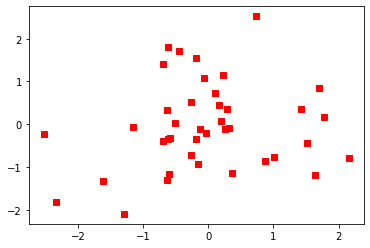

In [ ]:
plt.plot([p[0] for p in ps], [p[1] for p in ps], 'rs')

In [ ]:
from scipy.spatial import Delaunay

In [ ]:
def get_delaunay_edges(ps):
    edges = set()
    
    simplices = Delaunay(ps).simplices
    for simplex in simplices:
        j = 2
        for i in range(3):
            edges.add(frozenset((simplex[i], simplex[j])))
            j = i

    return [(ps[i], ps[j]) for i, j in edges]

In [ ]:
edges = get_delaunay_edges(ps)

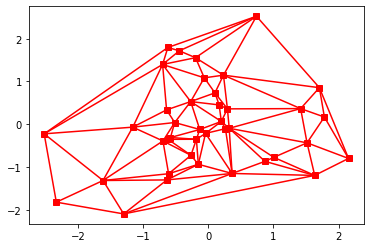

In [ ]:
plt.plot([p[0] for p in ps], [p[1] for p in ps], 'rs')
for edge in edges:
    p1, p2 = edge
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '-r')

In [ ]:
g = UndirectedAdjacencySetGraph(ps, edges)

In [ ]:
from collections import deque

Try depth first search

In [ ]:
def dfs(g, vstart):
    finished = {v: False for v in g.vertices()}
    Q = [vstart] # Stack
    while Q:
        v1 = Q.pop()
        if not finished[v1]:
            yield v1
            finished[v1] = True
            for v2 in g.nbrs(v1):
                if not finished[v2]:
                    Q.append(v2)

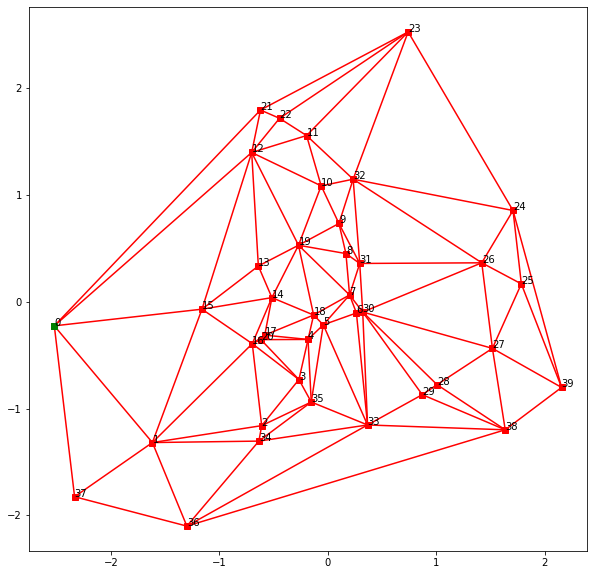

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot([p[0] for p in ps], [p[1] for p in ps], 'rs')
for edge in edges:
    p1, p2 = edge
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '-r')

pstart = ps[0]
plt.plot(pstart[0], pstart[1], 'gs')
for i, p in enumerate(dfs(g, pstart)):
    plt.text(p[0], p[1], str(i))

Try breadth first search

In [ ]:
def bfs(g, vstart):
    finished = {v: False for v in g.vertices()}
    Q = deque([vstart]) # Deque
    while Q:
        v1 = Q.popleft()
        if not finished[v1]:
            yield v1
            finished[v1] = True
            for v2 in g.nbrs(v1):
                if not finished[v2]:
                    Q.append(v2)

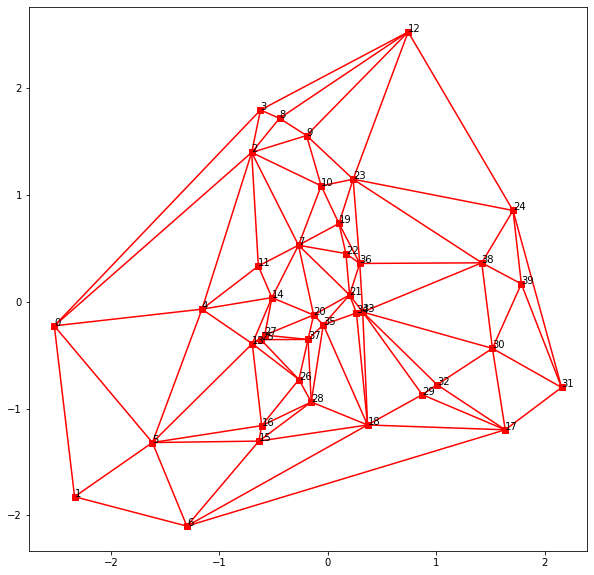

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot([p[0] for p in ps], [p[1] for p in ps], 'rs')
for edge in edges:
    p1, p2 = edge
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '-r')

pstart = ps[0]
for i, p in enumerate(bfs(g, pstart)):
    plt.text(p[0], p[1], str(i))

Try dijkstra

In [ ]:
from cs371.module19 import Heap3 as priorityqueue

In [ ]:
def dijkstra(g, vstart, get_score, node_prev):
    finished = {v: False   for v in g.vertices()}
    scores   = {v: -np.inf for v in g.vertices()}
    scores[vstart] = 0
    Q = priorityqueue([(scores[vstart], vstart)]) # Max heap priority queue; so maximize "score"
    while Q:
        cost, v1 = Q.pop_max()
        if not finished[v1]:
            yield v1
            finished[v1] = True
            for v2 in g.nbrs(v1):
                if not finished[v2]:
                    score_new = scores[v1] + get_score(v1, v2)
                    if score_new > scores[v2]:
                        node_prev[v2] = v1
                        scores[v2] = score_new
                        Q.add((scores[v2], v2))

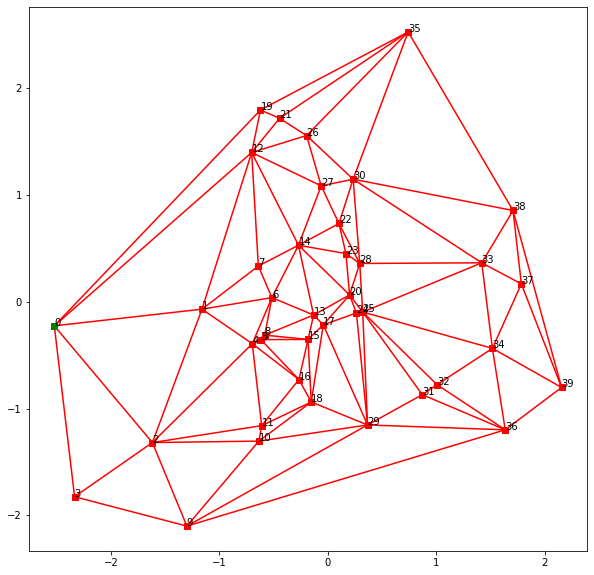

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot([p[0] for p in ps], [p[1] for p in ps], 'rs')
for edge in edges:
    p1, p2 = edge
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '-r')
plt.plot(pstart[0], pstart[1], 'gs')

_get_score = lambda v1, v2 : -np.sqrt((v1[0]-v2[0])**2 + (v1[1]-v2[1])**2)
node_prev  = {v: None for v in g.vertices()}
pstart = ps[0]
for i, p in enumerate(dijkstra(g, pstart, _get_score, node_prev)):
    plt.text(p[0], p[1], str(i))

Plot optimal paths

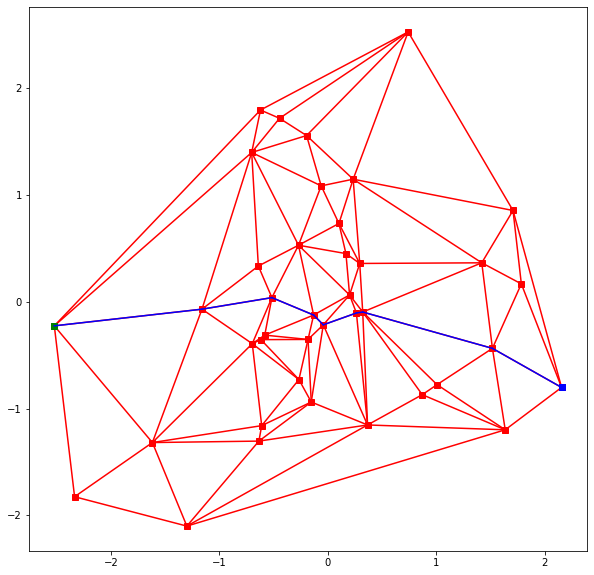

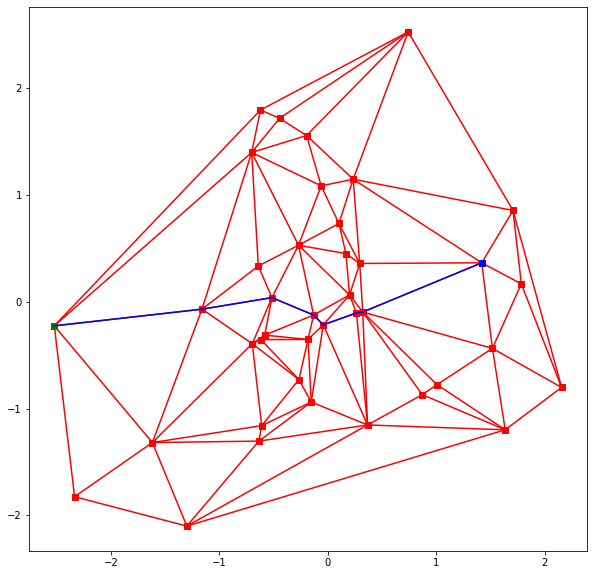

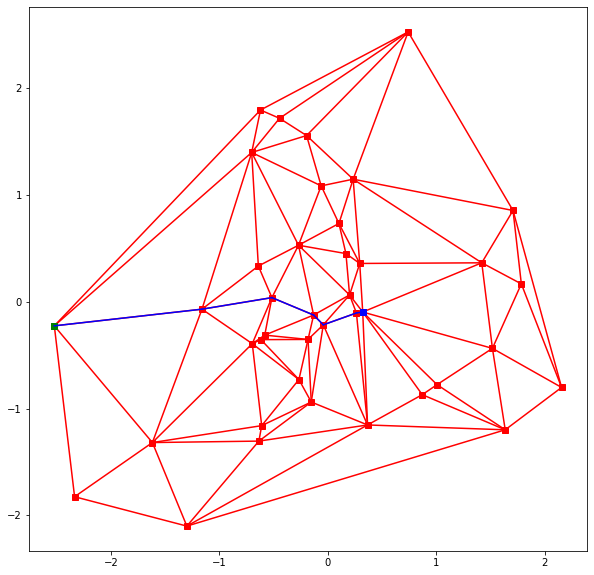

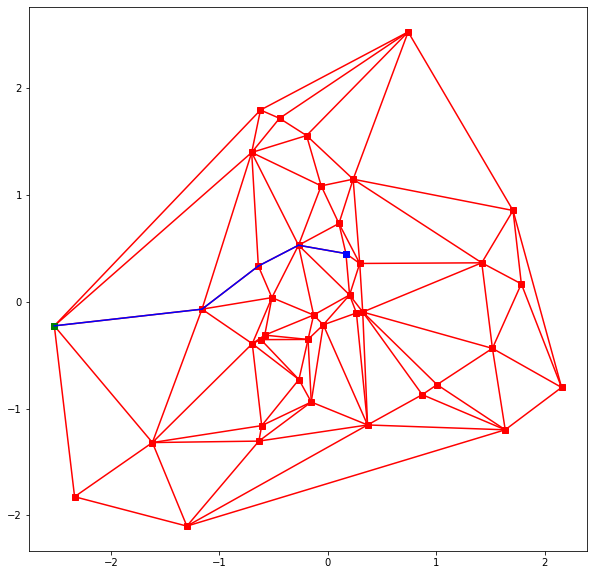

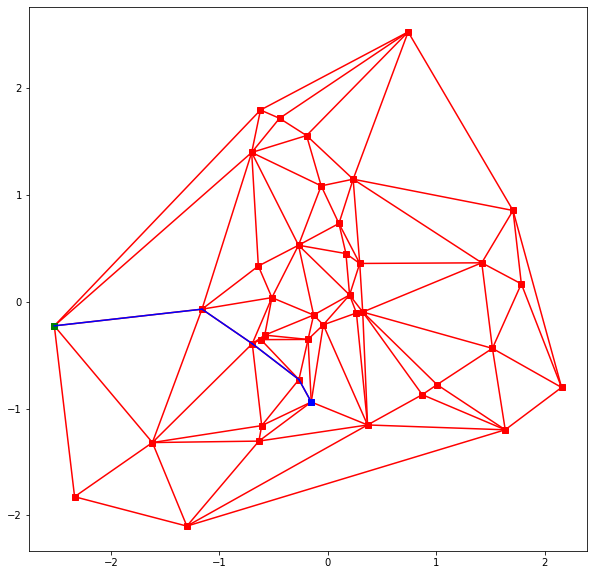

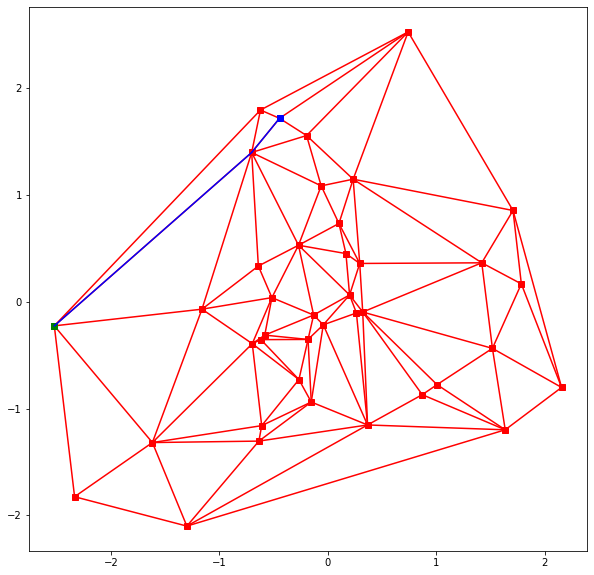

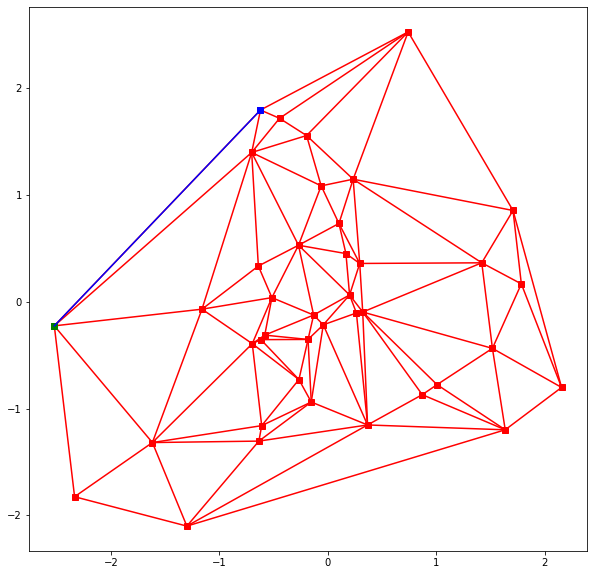

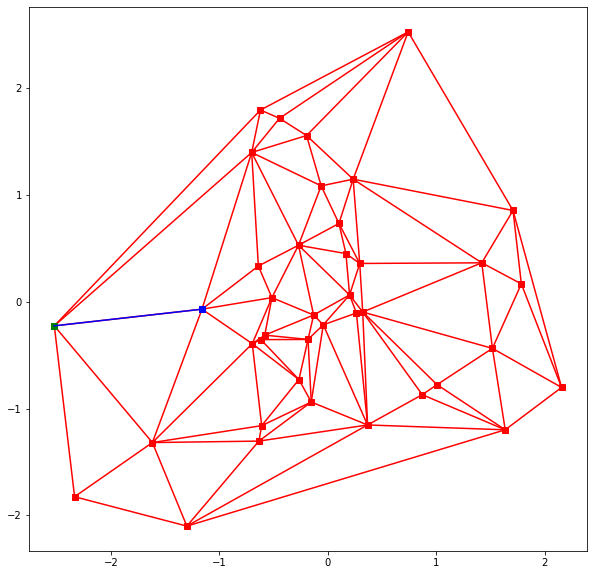

In [ ]:
for i in range(-1, -len(ps), -5):
    plt.figure(figsize=(10, 10))
    plt.plot([p[0] for p in ps], [p[1] for p in ps], 'rs')
    for edge in edges:
        p1, p2 = edge
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '-r')
    plt.plot(pstart[0], pstart[1], 'gs')

    pend = ps[i]
    plt.plot(pend[0], pend[1], 'bs')
    p = pend
    while node_prev[p]:
        p_prev = node_prev[p]
        plt.plot([p[0], p_prev[0]], [p[1], p_prev[1]], '-b')
        p = p_prev

# Build

In [ ]:
build_notebook()

<IPython.core.display.Javascript object>

Converted module21.ipynb.
